## 1. Logistic Regression: Experiment

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Reading data
data = pd.read_csv("spam_data.txt", delim_whitespace=True, header=None).values.astype('float64')
labels = pd.read_csv("spam_labels.txt", delim_whitespace=True, header=None).values.astype('int').reshape(-1) 

# Adding column of 1. for bias
bias_column = np.ones((len(data),1), 'float')
data = np.hstack((data, bias_column))

labels = labels*2-1  # Convert to +1/-1 encoding
data.shape, labels.shape

((4601, 58), (4601,))

In [3]:
# These are vectorized implementations
def sigmoid(t):
    return 1/(1+np.exp(-t))

def loss(y, p):
    return np.log(1+np.exp(-y*p)).mean()

def prediction(x,w):
    return sigmoid(x @ w)

def gradient(x,w,y):
    a = y*sigmoid(-y * (x@w))
    return -(x.T @ a)/data.shape[0]

In [4]:
def logistic_train(data, labels, epsilon=1e-5, maxiter=1000):
    weights = np.zeros((data.shape[1],), 'float')
    learning_rate = .1
    last_pred = None

    for i in range(maxiter):
        p = prediction(data, weights)
        
        if last_pred is not None and np.abs(p-last_pred).mean()<epsilon:
            break
        else:
            last_pred = p

        g = gradient(data, weights, labels)
        weights = weights - learning_rate * g
        
    return weights

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=2000, shuffle=False)

ns = [200, 500, 800, 1000, 1500, 2000]
accs = []

for n in ns:
    weights = logistic_train(train_data[:n], train_labels[:n])
    
    predictions = prediction(test_data, weights)
    predictions[predictions>=.5] = 1
    predictions[predictions<.5] = -1
    
    acc = accuracy_score(test_labels, predictions)
    accs.append(acc)
    print(f"{n=}, {acc=:.4f}")

n=200, acc=0.9146
n=500, acc=0.9196
n=800, acc=0.9204
n=1000, acc=0.9220
n=1500, acc=0.9293
n=2000, acc=0.9300


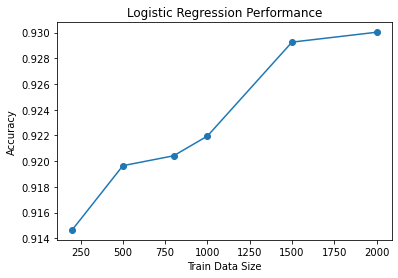

In [6]:
plt.title("Logistic Regression Performance")
plt.xlabel("Train Data Size")
plt.ylabel("Accuracy")
plt.plot(ns, accs, '-o');
plt.savefig("n_vs_acc.png");

In [7]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression().fit(train_data, train_labels)
accuracy_score(test_labels, m.predict(test_data))

0.9384851980007689